# Homework 2 - Introduction to Data Science - Fall 2021 - Solutions Draft 1

# Problem 1

In [4]:
Y = [1.11659426, 0.14591992, 0.9003231 , 1.05267893, 0.59665315,
       0.62196716, 0.0501256 , 2.2569046 , 0.59176357, 0.27908501,
       0.09001983, 0.05302138, 0.19794783, 0.71657887, 0.94523602,
       0.44210873, 0.17189032, 0.4104458 , 0.30163634, 1.0564698 ,
       0.15813088, 1.57609817, 0.62982101, 0.37747863, 0.10139393,
       2.44308245, 0.52684559, 0.73786292, 0.21034834, 0.44559072,
       0.16346868, 0.51826629, 0.0785872 , 0.21773059, 0.14507205,
       0.26167145, 1.30119327, 0.00881093, 0.77196405, 0.96493311,
       0.57850034, 0.6733615 , 0.53110575, 2.84934561, 0.09835044,
       0.11307157, 1.3428276 , 0.1704228 , 0.41692473, 1.48197104,
       0.05143844, 0.2103084 , 0.33847738, 1.19901459, 0.13828761,
       0.56981701, 0.07084937, 0.63245193, 0.66973814, 0.23941691,
       0.1019617 , 0.77316563, 0.19573404, 0.54167001, 0.18553303,
       0.42725298, 0.59527454, 0.91323428, 0.7351151 , 0.65058701,
       0.0504051 , 0.45197308, 0.04504415, 0.28518144, 1.34887045,
       0.69967626, 0.23990762, 0.03207982, 0.00399789, 0.03258423,
       1.05381261, 0.08938671, 1.04649714, 0.1472991 , 0.02720062,
       0.01421303, 0.23445255, 0.95165048, 0.20992524, 0.19655135,
       0.64897642, 0.27907629, 1.21557848, 0.27363763, 0.29139022,
       0.40552119, 0.09628245, 0.09214942, 0.19160858, 0.41977512]

## 1.1

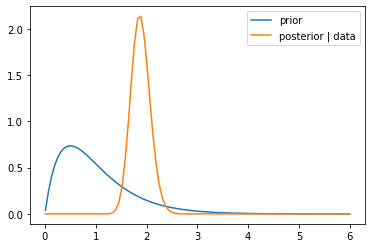

In [5]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

support = np.linspace(0.01, 6, 100)

likelihood = np.array([np.prod(stats.expon.pdf(Y, loc=0, scale=1/lbd)) for lbd in support])

prior = stats.gamma.pdf(support, a=2, scale=1/2)

integrand = prior * likelihood
post = (prior * likelihood) / np.trapz(integrand, support)

fig, ax = plt.subplots(1,1)
ax.plot(support, prior)
ax.plot(support, post)
ax.legend(labels=["prior", "posterior | data"]);

## 1.2

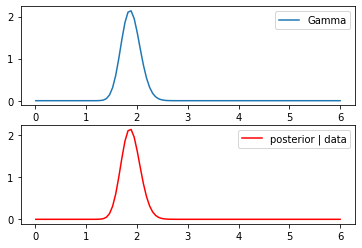

In [6]:
gvalue = stats.gamma.pdf(support, a=2+len(Y), scale=1/(2+sum(Y)))

ax1 = plt.subplot(2,1,1)
ax1.plot(support,gvalue);
ax1.legend(labels=["Gamma"])
ax2 = plt.subplot(2,1,2)
ax2.plot(support, post,'r');
ax2.legend(labels=["posterior | data"]);

In [9]:
a = len(Y)
print (a)

shape(Y)


100


NameError: name 'shape' is not defined

#### Answer: 
Yes.

## 1.3

In [4]:
np.random.seed(seed=553)

lbd_0 = 1
m = 10000
lbd = [lbd_0]

# Target function.
def f(x):
    return (x**100) * np.exp(-x*sum(Y)) * stats.gamma.pdf(x, a=2, scale=1/2)

for i in range(m):
    lbd_star = stats.norm.rvs(size=1, loc=lbd[-1], scale=1/2)
    # MH ratio.
    alpha = (f(lbd_star) * stats.norm.pdf(x=lbd[-1], loc=lbd_star, scale=1/2)) / (f(lbd[-1]) * stats.norm.pdf(x=lbd_star, loc=lbd[-1], scale=1/2))
    ratio = min([alpha,1])
    u = stats.uniform.rvs()
    if u < ratio:
        lbd.append(lbd_star)

count = 0
for i in range(len(lbd)):
    if lbd[i] < 2:
        count += 1

acpt_rate = len(lbd)/m

print('The acceptance rate of MH is {0:0.4f}'. format(acpt_rate))

estprob_MH = count/len(lbd)

print('The estimated probability by MH is {0:0.4f}'. format(estprob_MH))

The acceptance rate of MH is 0.4069
The estimated probability by MH is 0.7149


## 1.4
Results may differ depending on the values for `S` and `g` and whether normalization is used in the target function.

In [5]:
np.random.seed(seed=436)

M = 10**(-15)

S = stats.norm.rvs(size=10000, loc = 0, scale=2)

def f(x):
    values = (x**100)*np.exp(-x*sum(Y))*stats.gamma.pdf(x,a=2, scale=1/2)
    return values

g = stats.norm.pdf(S,loc = 0,scale=2)

ratio = f(S)/g

samples = S[stats.uniform.rvs(size=10000) <= ratio/M]

np.sum(np.array(samples<2))/len(samples)

acpt_rate = len(samples)/m
print('The acceptance rate of rejection sampling is {0:0.4f}'. format(acpt_rate))

estprob_r = np.sum(np.array(samples<2))/len(samples)
print('The estimated probability by rejection sampling is {0:0.4f}'. format(estprob_r))

prob_t = stats.gamma.cdf(2, a=2+len(Y), scale=1/(2+sum(Y)))
print('The true probability is {0:0.4f}'. format(prob_t))

The acceptance rate of rejection sampling is 0.0554
The estimated probability by rejection sampling is 0.7437
The true probability is 0.7437


### Answer:
Either could be said to be better based on higher acceptance rate or lower probability estimation error. For full credit, both criteria were expected to be discussed.

# Problem 2
Results may differ depending on whether normalization is performed or stratified test/train splitting is used.

In [6]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer_bunch = load_breast_cancer()
cancer_pred = pd.DataFrame(cancer_bunch['data'], columns=cancer_bunch['feature_names'])
cancer_targ = pd.DataFrame(cancer_bunch['target'], columns=["Class"])

scaler = StandardScaler()
cancer_pred = scaler.fit_transform(cancer_pred)

## 2.1

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_pred, cancer_targ, test_size = 1/5, random_state = 636)

## 2.2

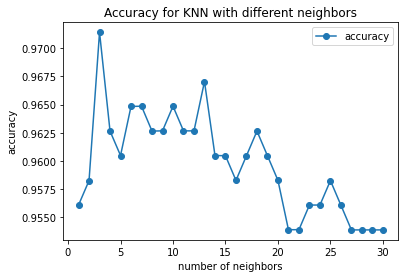

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k = (range(1,31))
knn_score = []
for i in k:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn_model, X_train, np.ravel(y_train), cv = 4, scoring='accuracy')
    knn_score.append(np.mean(scores))

plt.plot(k, knn_score, "-o", label = "accuracy")
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.title('Accuracy for KNN with different neighbors')
plt.legend()
plt.show()

### Answer:
3.

## 2.3

accuracy score on test set: 0.9386


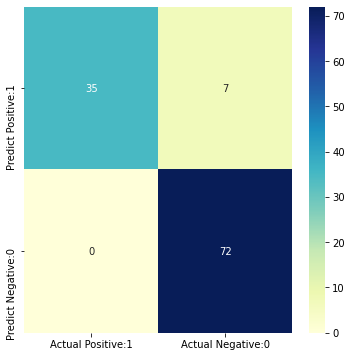

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns 

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, np.ravel(y_train))
y_pred_test = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred_test)
print('accuracy score on test set: {0:0.4f}'. format(acc))

cm_knn = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,6))

confusion_m = pd.DataFrame(data=cm_knn, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(confusion_m , annot=True, fmt='d', cmap='YlGnBu');

# Problem 3
Results may differ depending on whether normalization is performed or stratified test/train splitting is used.

In [10]:
NB = pd.read_csv("NB.csv")

## 3.1

In [11]:
def MOM_estimators(x):
    mean = np.mean(x)
    var = np.var(x,ddof=1)
    part = (mean*(1-mean))/var
    a = mean*(part-1)
    b = (1-mean)*(part-1)
    return(a, b)

## 3.2

In [12]:
import scipy.stats as stats

class beta_naive_bayes(object):

    def estimate(self, X, C):
        self.param = dict()
        for k in np.unique(C): 
            members = (C == k) # Boolean array.
            num = members.sum() # Get number of observations in class k.
            prior = num / float(C.size) # Calculate prior probability.
            a, b = MOM_estimators(X[members]) # Calculate a, b.
            self.param[k] = (prior, a, b)
        return self

    def prediction(self, T):
        k_pred = -1 * np.ones(T.size)
       
        for i in range(T.size): 
            pmax, kmax = -1, None # Initialize.
            for k in self.param:
                prior, a, b = self.param[k] # Get class k parameters.
                p = prior * stats.beta.pdf(T.values[i], a, b) # Calculate posterior probability.
                if p > pmax:
                    pmax = p # Update pmax.
                    kmax = k # Get class k according to max p.
            k_pred[i] = kmax # Get prediction for observation i.
        return k_pred

## 3.3

In [14]:
feature = NB['Feature']
label = NB['Class']

X, X_test, C, y_test = train_test_split(feature, label, test_size=4/5, random_state=436)

k_pred1 =  beta_naive_bayes().estimate(X, C).prediction(X_test)

acc = np.mean(y_test == k_pred1)
print('accuracy score on test set: {0:0.4f}'. format(acc))

accuracy score on test set: 0.9945


# Problem 4
Results may differ depending on whether normalization is performed or stratified test/train splitting is used.

In [15]:
import pandas as pd
smarket = pd.read_csv("Smarket.csv")

## 4.1

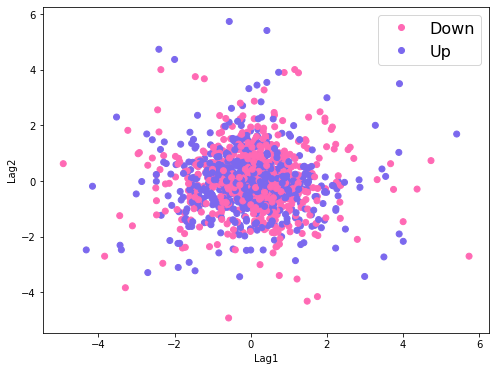

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

feature1 = 'Lag1'
feature2 = 'Lag2'
lag1 = smarket[feature1]
lag2 = smarket[feature2]
direction = smarket['Direction']

fig, ax = plt.subplots(figsize=(8,6));
cmap_bold = ListedColormap(['#FF69B4', '#7B68EE'])
scatter = ax.scatter(lag1,lag2,c=direction,cmap=cmap_bold)
ax.legend(handles=scatter.legend_elements()[0],labels=['Down','Up'], fontsize=16);
ax.set_xlabel(feature1)
ax.set_ylabel(feature2);

## 4.2

In [17]:
X_train = smarket.loc[smarket['Year']<2005][['Lag1','Lag2']]
y_train = smarket.loc[smarket['Year']<2005]['Direction']
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = smarket.loc[smarket['Year']==2005][['Lag1','Lag2']]
y_test = smarket.loc[smarket['Year']==2005]['Direction']
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

## 4.3

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(X_train, y_train)

print("Training accuracy of "+str(LDA_model)+":\t",LDA_model.score(X_train, y_train))
print("Test accuracy of "+str(LDA_model)+":\t\t",LDA_model.score(X_test, y_test))
print("Training accuracy of "+str(QDA_model)+":\t",QDA_model.score(X_train, y_train))
print("Test accuracy of "+str(QDA_model)+":\t",QDA_model.score(X_test, y_test))

Training accuracy of LinearDiscriminantAnalysis():	 0.5160320641282565
Test accuracy of LinearDiscriminantAnalysis():		 0.5595238095238095
Training accuracy of QuadraticDiscriminantAnalysis():	 0.5140280561122245
Test accuracy of QuadraticDiscriminantAnalysis():	 0.5992063492063492


## 4.4

In [19]:
# Based on classification map from Lecture 12.
import numpy as np

def classification_map(X, y,classifier, X_test=None, y_test=None, h=0.01, figsize=(10,10)):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    i = 0
    j = 1
    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
    cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
    # Points in a mesh of [x_min, m_max] x [y_min, y_max].
    x_min, x_max = X[:,i].min()-1, X[:,i].max()+1
    y_min, y_max = X[:,j].min()-1, X[:,j].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(grid)
    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=figsize)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')
    # Plot also the training points.
    plt.scatter(X[:,i], X[:,j], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification with classifier "+str(classifier))
    if not X_test is None and not y_test is None: # If test set features are provided, overlay classified labels on test set as well.
        plt.scatter(X_test[:,i], X_test[:,j], c=y_test,cmap=cmap_bold,marker="x")
    ax=plt.gca()
    ax.legend(["training data","test data"],loc=0,fontsize=8)

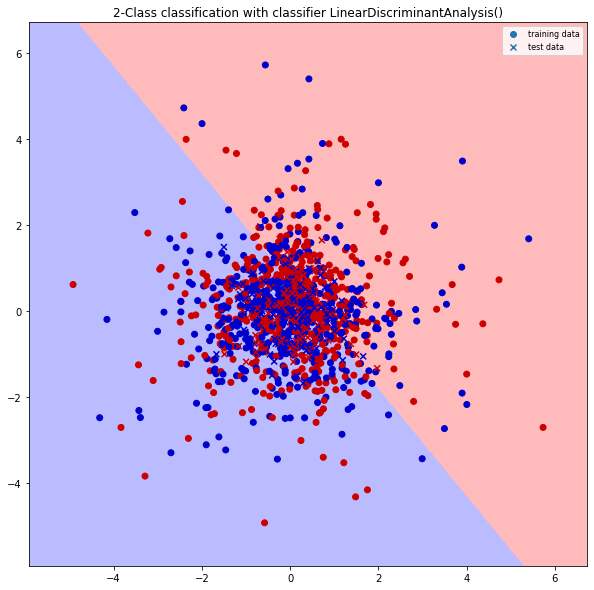

In [20]:
# LDA
classification_map(X_train,y_train,LDA_model,X_test=X_test,y_test=y_test,figsize=(10,10))

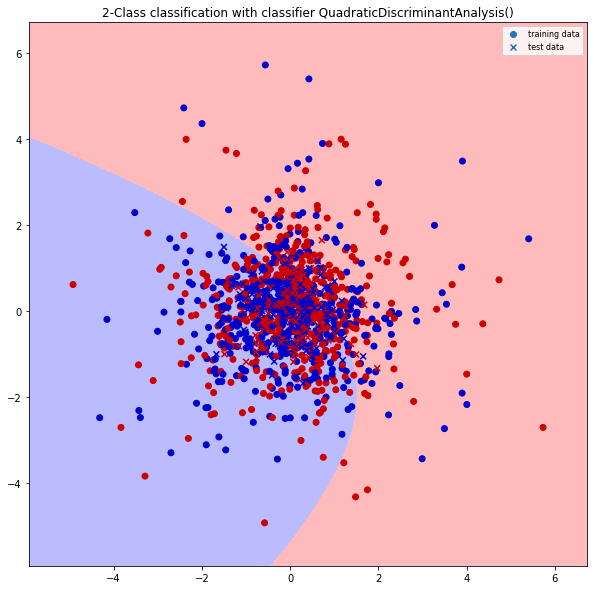

In [21]:
# QDA
classification_map(X_train,y_train,QDA_model,X_test=X_test,y_test=y_test,figsize=(10,10))